# KNN Algorithm

# Importing dependencies

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# What is the K-Nearest Neighbors Algorithm?
KNN is one of the most basic yet essential classification algorithms in machine learning. It belongs to the supervised learning domain and finds intense application in pattern recognition, data mining, and intrusion detection.

It is widely disposable in real-life scenarios since it is non-parametric, meaning it does not make any underlying assumptions about the distribution of data. We are given some prior data (also called training data), which classifies coordinates into groups identified by an attribute.

Given another set of data points (also called testing data), allocate these points to a group by analyzing the training set.

# Loading our data

In [30]:
# add the link of your dataset here:
df = pd.read_csv('data.csv')

df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


## Data Dictionary
- Age:  Age in years.
- fare:  Passenger fare.
- sex:  Sex of the passenger.
- sibsp  # of siblings / spouses aboard the Titanic.
- parch  # of parents / children aboard the Titanic.
- pclass  Ticket class  1 = 1st, 2 = 2nd, 3 = 3rd.
- embarked  Port of Embarkation  0 = Cherbourg, 1 = Queenstown, 3 = Southampton.
- survival  Survival  0 = No, 1 = Yes.


# Data Preprocessing

Removing null values

In [31]:
df.shape

(336, 3)

In [32]:
df.isnull().sum(axis = 0)

x        0
y        0
color    0
dtype: int64

In [33]:
df = df.dropna()
df.isnull().sum(axis = 0)

x        0
y        0
color    0
dtype: int64

In [34]:
df.shape

(336, 3)

In [35]:
df.head()

,x,y,color
0,516.012706,393.014514,0
1,436.211762,408.656585,0
2,512.052601,372.022014,0
3,489.140464,401.807159,0
4,446.207986,338.516682,0


Splitting the data into training and testing data

In [36]:
y = df['color']
X = df.drop('color', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.3, random_state = 0)



# How to choose the value of k for KNN Algorithm?

The value of k is very crucial in the KNN algorithm to define the number of neighbors in the algorithm. The value of k in the k-nearest neighbors (k-NN) algorithm should be chosen based on the input data. If the input data has more outliers or noise, a higher value of k would be better. It is recommended to choose an odd value for k to avoid ties in classification

Here we've tried a range of K values.
Feel free to try the range you want and see what's the best value.

In [37]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
	clf = KNeighborsClassifier(n_neighbors = k)
	clf.fit(X_train, y_train)

	training_score = clf.score(X_train, y_train)
	test_score = clf.score(X_test, y_test)
	K.append(k)

	training.append(training_score)
	test.append(test_score)
	scores[k] = [training_score, test_score]


In [38]:
for keys, values in scores.items():
    print(keys, ':', values)


2 : [0.9574468085106383, 0.9306930693069307]
3 : [0.9702127659574468, 0.9702970297029703]
4 : [0.9744680851063829, 0.9702970297029703]
5 : [0.9744680851063829, 0.9702970297029703]
6 : [0.9744680851063829, 0.9702970297029703]
7 : [0.9787234042553191, 0.9702970297029703]
8 : [0.9744680851063829, 0.9702970297029703]
9 : [0.9744680851063829, 0.9702970297029703]
10 : [0.9744680851063829, 0.9702970297029703]
11 : [0.9744680851063829, 0.9702970297029703]
12 : [0.9744680851063829, 0.9702970297029703]
13 : [0.9744680851063829, 0.9702970297029703]
14 : [0.9744680851063829, 0.9702970297029703]
15 : [0.9744680851063829, 0.9702970297029703]
16 : [0.9744680851063829, 0.9702970297029703]
17 : [0.9744680851063829, 0.9702970297029703]
18 : [0.9744680851063829, 0.9702970297029703]
19 : [0.9744680851063829, 0.9702970297029703]
20 : [0.9744680851063829, 0.9702970297029703]


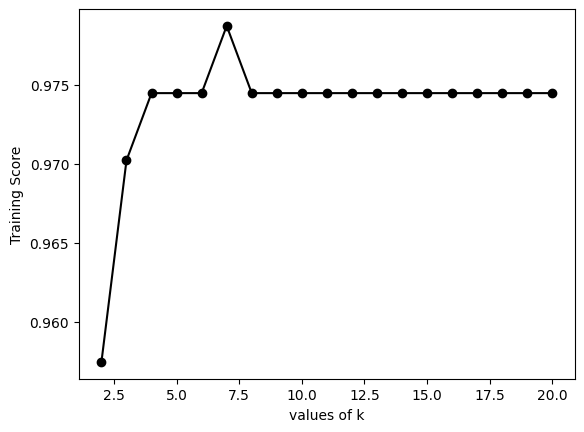

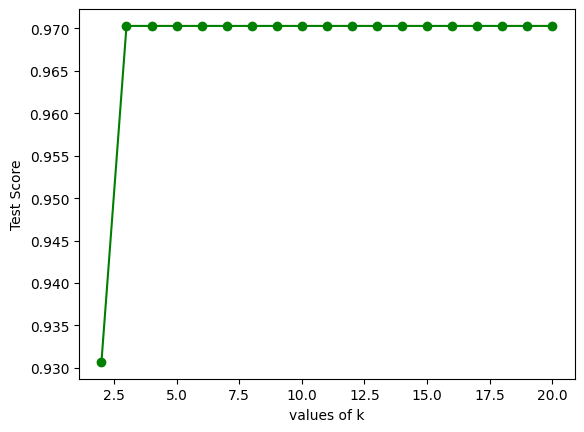

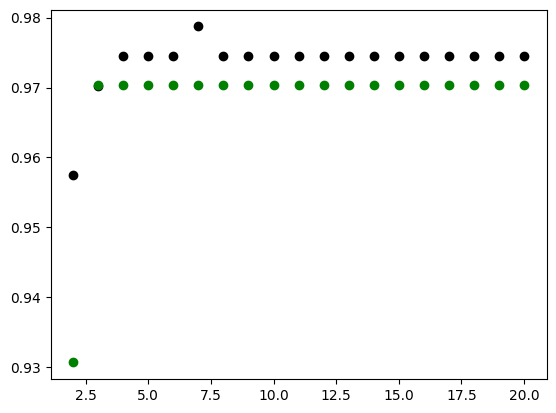

In [39]:
# train score.
plt.plot(K, training, marker='o', color='k')
plt.xlabel('values of k')
plt.ylabel('Training Score')
plt.show()

# Test score.

plt.plot(K, test, marker='o', color='g')
plt.xlabel('values of k')
plt.ylabel('Test Score')
plt.show()

# Train score Vs. test score

plt.scatter(K, training, color='k')
plt.scatter(K, test, color='g')
plt.show()

# K-means Algorithm

# Importing dependencies

In [40]:
import json
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [41]:
# add the link of your dataset here:

df=pd.read_json('sarcasm.json')

In [42]:

# Extract the sentence only
sentence = df.headline

print(sentence)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object


In [43]:

# create vectorizer
vectorizer = TfidfVectorizer(stop_words='english')


# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(sentence)

In [44]:
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [45]:
# cluster the documents using k-means
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
				max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

KMeans(max_iter=500, n_clusters=2, n_init=5, random_state=42)

In [46]:

# create a dataframe to store the results
results = pd.DataFrame()

results['document'] = sentence
results['cluster'] = kmeans.labels_

results.head()

,document,cluster
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,0
3,"boehner just wants wife to listen, not come up...",0
4,j.k. rowling wishes snape happy birthday in th...,0


In [47]:
# print random 25 samples
print(results.sample(5))

                                                document  cluster
14523                         an epidemic of gun silence        0
23429               buick introduces new self-buying car        0
21597  bernie sanders endorses tom perriello in virgi...        0
24281  tuesday's morning email: rnc returns to roy mo...        0
10012  chrissy teigen would like everyone to stop wor...        0


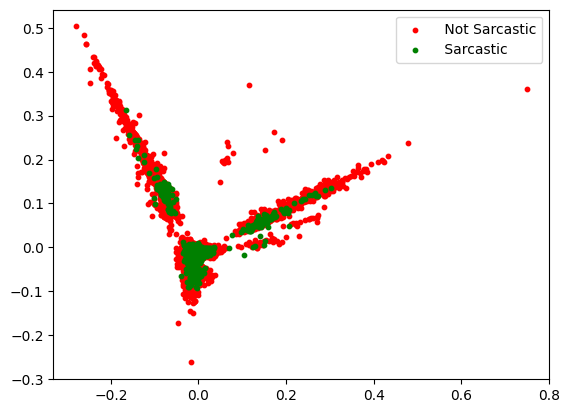

In [48]:
# plot the results
colors = ['red', 'green']
cluster = ['Not Sarcastic','Sarcastic']
for i in range(num_clusters):
	plt.scatter(reduced_data[kmeans.labels_ == i, 0],
				reduced_data[kmeans.labels_ == i, 1],
				s=10, color=colors[i],
				label=f' {cluster[i]}')
plt.legend()
plt.show()
